<a href="https://colab.research.google.com/github/MahmoudAlsayes/pythonProject/blob/master/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduction to Regression with nural network

In [ ]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.17.0


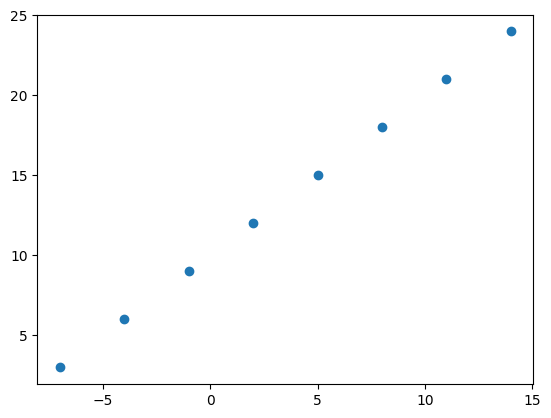

In [ ]:
## Create data to view and fit
import numpy as np
import matplotlib.pyplot as plt
# Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#visualize it
plt.scatter(X,y)

In [ ]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
hous_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
hous_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensor
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
X.shape

TensorShape([8])

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

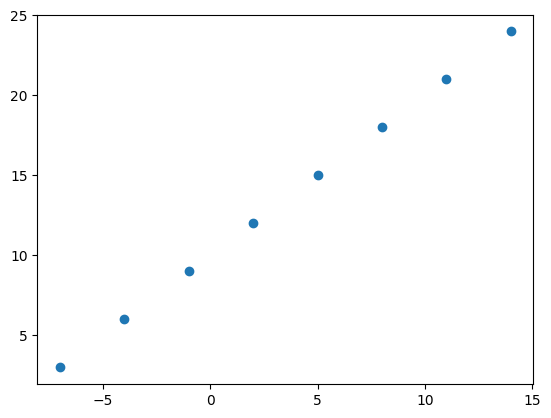

In [ ]:
plt.scatter(X,y)

## Steps in modeling with tensor
1. **Create a model** - define inout and output layers , as well as the hidden layers of a deep learning model
2. **compiling a model** - define the loss function / optimizer / evaluation
3. **Fitting a model**

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. create a model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # Stochastic gradient descent
              metrics=["mae"]
              )


# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.3667 - mae: 13.3667
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 13.2342 - mae: 13.2342
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - loss: 13.1017 - mae: 13.1017
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 12.9692 - mae: 12.9692
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 12.8367 - mae: 12.8367


In [ ]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make aprediction using our model
y_pred=model.predict(tf.expand_dims(17.0, axis=-1),)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[3.6722195]], dtype=float32)

In [ ]:
y_pred+16

array([[19.67222]], dtype=float32)

### Improving our model


In [ ]:
# Let's rebuild our model
# 1. create a model
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2.compie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


#3. fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 9.5107 - mae: 9.5107
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 9.3782 - mae: 9.3782
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 9.2457 - mae: 9.2457
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 9.1132 - mae: 9.1132
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 8.9807 - mae: 8.9807
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 8.8482 - mae: 8.8482
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 8.7157 - mae: 8.7157
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 8.5832 - mae: 8.5832
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 8.4507 - mae: 8.4507
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.3182 - mae: 8.3182
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 8.1857 - mae: 8.1857
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 8.0532 - mae: 8.0532
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/

In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make aprediction using our model
y_pred=model.predict(tf.expand_dims(17.0, axis=-1),)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[30.284058]], dtype=float32)

In [ ]:
# Let's improve the model
# 1. create the model (with extra hidden layer with 100 hidden units)
model =tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])
#2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.3678 - mae: 13.3678
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 12.6816 - mae: 12.6816
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.9942 - mae: 11.9942
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 11.3051 - mae: 11.3051
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 10.6131 - mae: 10.6131
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 9.9159 - mae: 9.9159
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 9.2107 - mae: 9.2107
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.4946 - mae: 8.4946
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 7.7644 - mae: 7.7644
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 7.0176 - mae: 7.0176
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 6.6505 - mae: 6.6505
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 6.8840 - mae: 6.8840
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred=model.predict(tf.expand_dims(17.0, axis=-1),)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[28.102118]], dtype=float32)

## Evaluating a model

In [ ]:
x=tf.range(-100,100,4)

In [ ]:
X=tf.expand_dims(tf.range(-100,100,4),axis=-1)
X

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56],
       [  60],
       [  64],
       [  68],
       [  72],
       [  76],
       [  80],
       [  84],
       [  88],
       [  92],
       [  96]], dtype=int32)>

In [ ]:
# Make a labels for the data set
y=x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

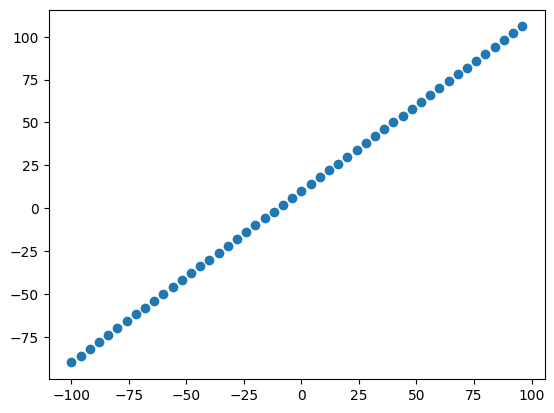

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### the 3 sets
1. **train**
2. **valid**
3. **test**


In [ ]:
# check the length
len(X)

50

In [ ]:
# Split the data into train and test dataset
X_train= X[:40]# first 40 training samples(80% of the data)
y_train=y[:40]
X_test= X[40:] # last 10 are testing samples (20% of the data)
y_test= y[40:]
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(40, 10, 40, 10)

 ## Visualizing the data


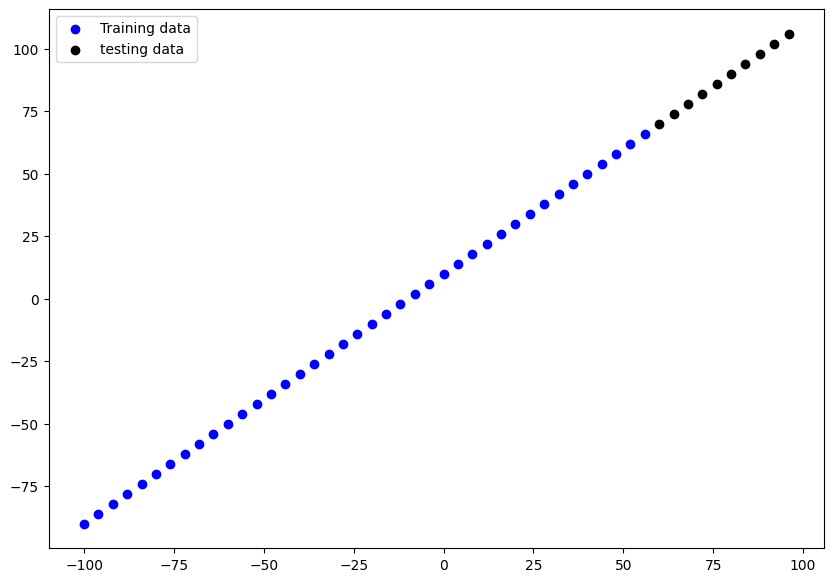

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="Training data")
plt.scatter(X_test,y_test,c="k",label="testing data")
plt.legend();

In [ ]:
## Lat's have a look for how build nn

#1.Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. fit the model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 11.3425 - mae: 11.3425 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.2248 - mae: 8.2248
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.8756 - mae: 8.8756
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.8309 - mae: 7.8309
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.7863 - mae: 10.7863
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.6373 - mae: 7.6373 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.9576 - mae: 11.9576 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.1428 - mae: 8.1428 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.6864 - mae: 8.6864
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.5532 - mae: 8.5532 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.3210 - mae: 8.3210
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.0643 - mae: 9.0643 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

### visualizing the model

In [ ]:
# model .build()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
X[0],y[0]

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([-100], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# from keras import models
# from keras import layers
# # Create a model witch builds automatically by defining the input_shape
# tf.random.set_seed(42)
# # 1. Create a model
# model = models.Sequential([])
# # model.add(layers.Dense(1,input_shape=[1,1]))
# model.add(layers.Dense(1,input_shape=[1,1]))

# # 2. compile the model
# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["mea"])

In [ ]:
from os import name
# Create a model witch builds automatically by defining the input_shape
# tf.random.set_seed(42)

#1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1,1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model")
# compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["mae"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1, 10)               │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1, 1)                │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Let's fit our model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 41.6689 - mae: 41.6689 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 41.5176 - mae: 41.5176
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 41.4240 - mae: 41.4240
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 41.3435 - mae: 41.3435 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 41.2862 - mae: 41.2862 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 41.2481 - mae: 41.2481
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 41.2100 - mae: 41.2100
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 41.1720 - mae: 41.1720 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 41.1359 - mae: 41.1359 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 41.1142 - mae: 41.1142 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 41.0987 - mae: 41.0987 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 41.0868 - mae: 41.0868
Epoch 13/100
2/2 ━━━

In [ ]:
# Get a summaer of our model
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1, 10)               │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1, 1)                │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

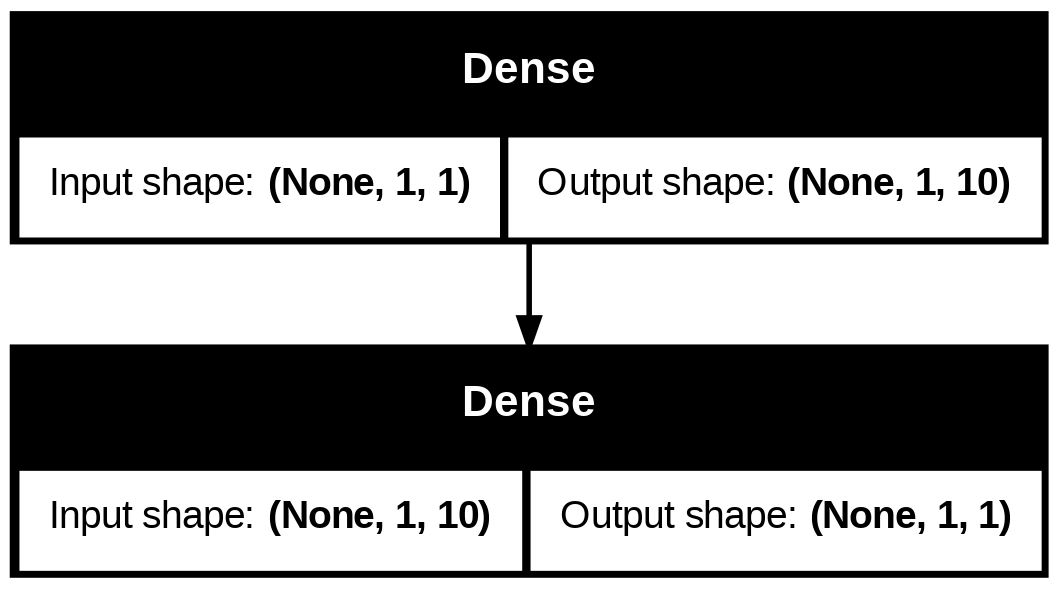

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

### Visualizing our model's prediction

In [ ]:
# Make some predictions
y_pred =model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[[5.7100334]],

       [[6.0930634]],

       [[6.476095 ]],

       [[6.859126 ]],

       [[7.24216  ]],

       [[7.625189 ]],

       [[8.008217 ]],

       [[8.391253 ]],

       [[8.774283 ]],

       [[9.157319 ]]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    prediction=y_pred):
  """
  plots training data , test data and compares predictions to ground truth
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  #plot testing data into green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  # PLot model's predictions in red
  plt.scatter(test_data,prediction,c="r",label="Predictions")
  #show the legend
  plt.legend();

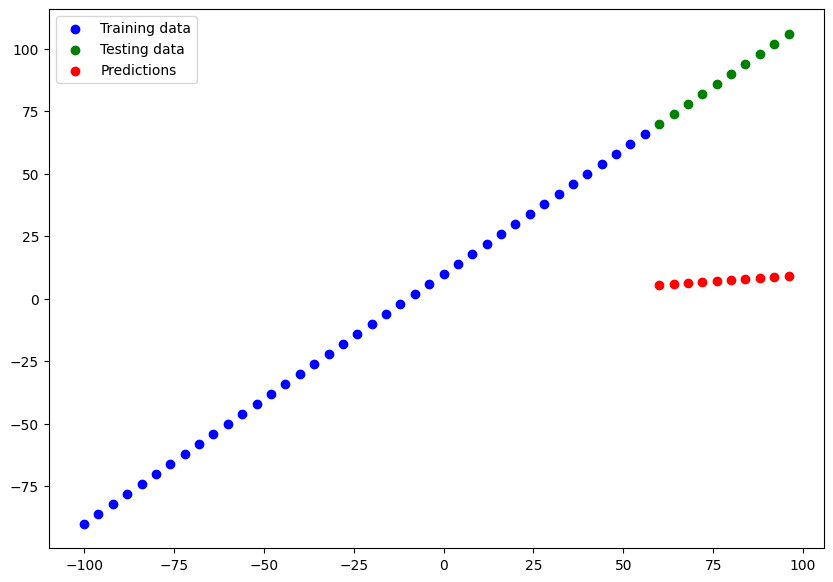

In [ ]:
plot_prediction()

### Evaliatino our models's predictions with regression evaluation metrics

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 80.5663 - mae: 80.5663


[80.56632232666016, 80.56632232666016]

In [ ]:
y_pred

array([[[5.7100334]],

       [[6.0930634]],

       [[6.476095 ]],

       [[6.859126 ]],

       [[7.24216  ]],

       [[7.625189 ]],

       [[8.008217 ]],

       [[8.391253 ]],

       [[8.774283 ]],

       [[9.157319 ]]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Calculate the mean absolut error
tf.keras.losses.MAE(
    y_test, y_pred
)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[82.28996 ],
       [81.90694 ],
       [81.5239  ],
       [81.14088 ],
       [80.75784 ],
       [80.37481 ],
       [79.99178 ],
       [79.60875 ],
       [79.225716],
       [78.84268 ]], dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([5.7100334, 6.0930634, 6.476095 , 6.859126 , 7.24216  , 7.625189 ,
       8.008217 , 8.391253 , 8.774283 , 9.157319 ], dtype=float32)>

In [ ]:
y_pred.shape

(10, 1, 1)

In [ ]:
mae=tf.keras.losses.MAE(
    y_true=y_test,y_pred=tf.squeeze(y_pred)
)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=80.56632>

### Calculate the mean square error

In [ ]:
tf.keras.losses.MSE(
    y_true=y_test,y_pred=tf.squeeze(y_pred)
)

<tf.Tensor: shape=(), dtype=float32, numpy=6598.8633>

In [ ]:
# Make some function to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.keras.losses.MAE(y_true=y_true,
                             y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.keras.losses.MSE(y_true=y_true,y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

In [ ]:
X_train , y_train

(<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56]], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
tf.random.set_seed(42)
#1.Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])
#2.compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"]
                )

# 3. fit
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 49.0783 - mae: 49.0783 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.2855 - mae: 16.2855
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.9656 - mae: 9.9656
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.2910 - mae: 8.2910 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.9757 - mae: 8.9757 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9999 - mae: 7.9999 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.6622 - mae: 9.6622
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9820 - mae: 7.9820 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6506 - mae: 9.6506 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9642 - mae: 7.9642 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.6389 - mae: 9.6389
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9463 - mae: 7.9463 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


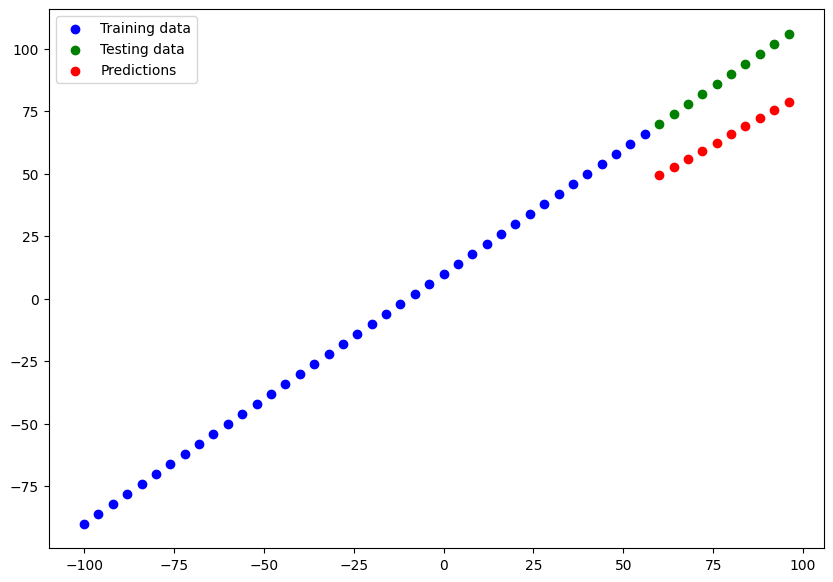

In [ ]:
# Make and plot prediction for model_1
y_preds_1=model_1.predict(X_test)
plot_prediction(prediction=y_preds_1)

In [ ]:
# Calcaulate model_1 evaluation
mae_1=mae(y_test,y_preds_1)
mse_1=mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=23.89494>,
 <tf.Tensor: shape=(), dtype=float32, numpy=576.0466>)

### Build model_2

In [ ]:
tf.random.set_seed(42)

#1. Create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2.compile
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

#3. fit the modl
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 34.9416 - mse: 1676.2484 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 28.7321 - mse: 1135.1902 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.2942 - mse: 410.5971 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.9663 - mse: 486.0320 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.7334 - mse: 424.0165 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.0662 - mse: 229.4733
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.9048 - mse: 310.9237 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.6469 - mse: 332.3325 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.6700 - mse: 213.9204 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.6276 - mse: 298.0428 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.6581 - mse: 330.6031
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.8879 - mse: 214.4785
Epoch 13/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


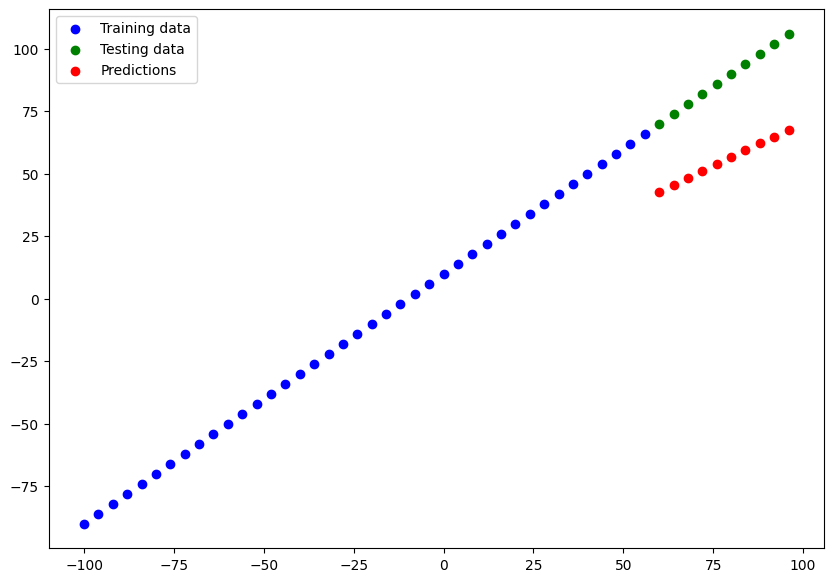

In [ ]:
# make and plot predictions of model_2
y_preds_2=model_2.predict(X_test)

plot_prediction(prediction=y_preds_2)

In [ ]:
# Calculate model_2
mae_2=mae(y_test,y_preds_2)
mse_2=mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=32.719612>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1083.4619>)

 # Build model_3

In [ ]:
tf.random.set_seed(42)

# 1. Create a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#3.fit
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 54.1969 - mae: 54.1969 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.6886 - mae: 24.6886 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.8204 - mae: 22.8204 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.7826 - mae: 22.7826 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.6621 - mae: 14.6621 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.9239 - mae: 18.9239 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.5693 - mae: 13.5693 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.8139 - mae: 14.8139
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.6019 - mae: 15.6019
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.6600 - mae: 11.6600 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.6241 - mae: 14.6241 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.6631 - mae: 15.6631 
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


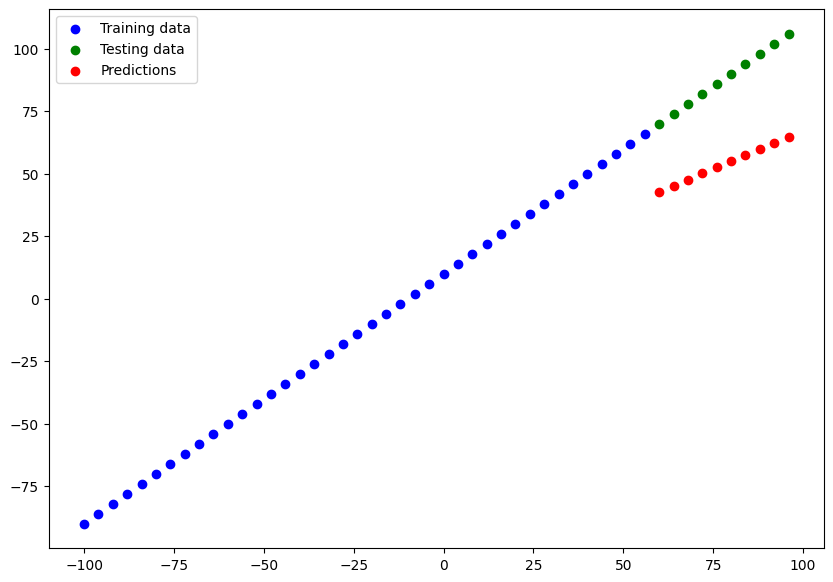

In [ ]:
# Make and plot
y_preds_3=model_3.predict(X_test)
plot_prediction(prediction=y_preds_3)

In [ ]:
# make mae
mae_3=mae(y_test,y_preds_3)
mse_3=mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=34.228584>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1191.909>)

### Comparing the result of our experiments


In [ ]:
# Let's compat our model's result using a pandas DataFrame
import pandas as pd
model_result=[["model_1",mae_1.numpy(),mse_1.numpy()],
             ["model_2",mae_2.numpy(),mse_2.numpy()],
             ["model_3",mae_3.numpy(),mse_3.numpy()],]

all_result=pd.DataFrame(model_result,columns=["model","mae","mse"])
all_result

,model,mae,mse
0,model_1,23.894939,576.046570
1,model_2,32.719612,1083.461914
2,model_3,34.228584,1191.909058


In [ ]:
model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Traking your experiments

## Saving our model

In [ ]:
# Save model using the HDF5 format
model_2.save('your_model_name.h5')


## Load model

In [ ]:
loaded_SaveModel_format=tf.keras.models.load_model("/content/your_model_name.h5")

In [ ]:
loaded_SaveModel_format.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Compare model_2 prediction with SavedModel format model prediction
model_2_preds=model_2.predict(X_test)
loaded_SaveModel_format_preds=loaded_SaveModel_format.predict(X_test)
model_2_preds==loaded_SaveModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_true=y_test,y_pred=model_2_preds)==mae(y_true=y_test,y_pred=loaded_SaveModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
model_2_preds.squeeze()==loaded_SaveModel_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# Download a model from Google colab

In [ ]:
from google.colab import files
files.download("/content/your_model_name.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !cp //content/your_model_name.h5 /#to path file#

# Large example

In [ ]:
X_train ,y_train

(<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56]], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
#import required library
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# read in the insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance["age"]

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [ ]:
# transfer the opject data to numbers byy ONEHOT ENCODER (pd.get_dummies)
insurance_one_hot=pd.get_dummies(insurance,dtype="uint8")
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


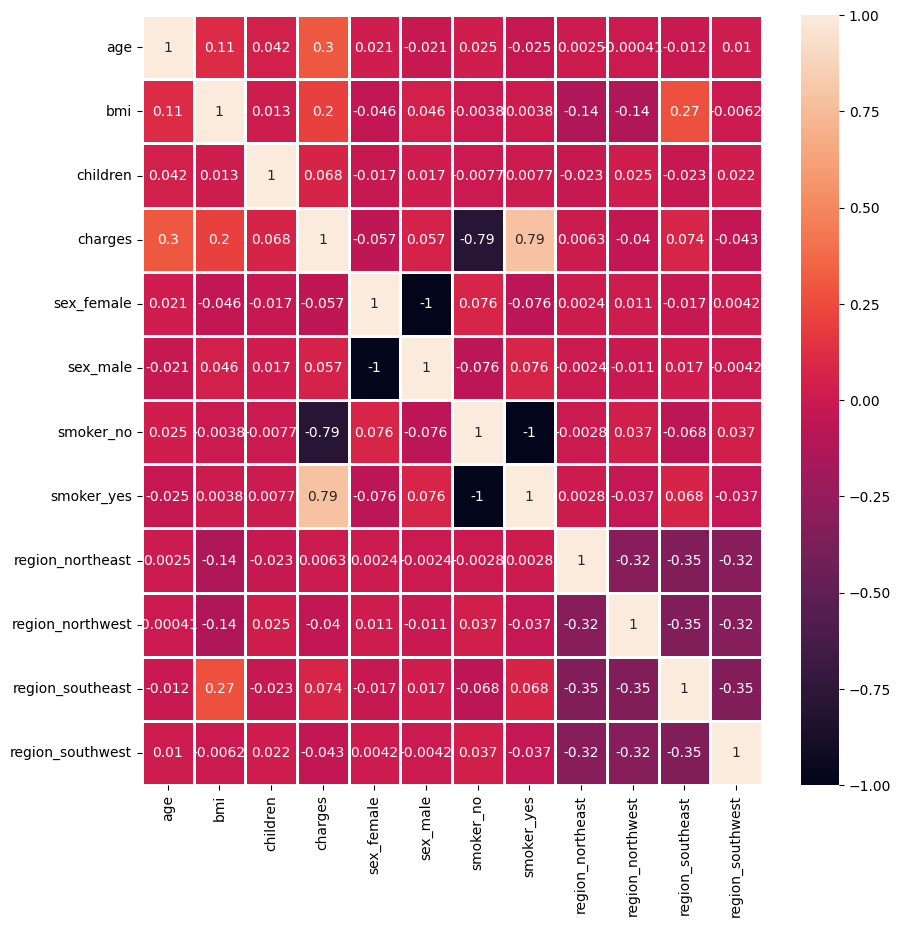

In [ ]:
import seaborn as sns
coor_matrix=insurance_one_hot.corr()
plt.figure(figsize=(10,10))
sns.heatmap(coor_matrix,annot=True, linewidth=2)
plt.show()


In [ ]:
insurance_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [ ]:
# Create X Y values (features and labels)
X = insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View Y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network (sort of like model_2)
tf.random.set_seed(42)
#1.Create a model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2.compile
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# 3.fit
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10224.8857 - mae: 10224.8857   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7736.4136 - mae: 7736.4136 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7481.2876 - mae: 7481.2876 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7550.9404 - mae: 7550.9404 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7399.3110 - mae: 7399.3110 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7726.2441 - mae: 7726.2441
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7668.2842 - mae: 7668.2842 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7827.6558 - mae: 7827.6558 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7596.5908 - mae: 7596.5908 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7602.7300 - mae: 7602.7300 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7417.2085 - mae: 7417.2085 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# check the result on test data
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8055.3911 - mae: 8055.3911  


[8023.25927734375, 8023.25927734375]

In [ ]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

In [ ]:
# Try an exiperiment

In [ ]:
tf.random.set_seed(42)
# 1. create a model
insurance_model_02=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model_02.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["mae"])
# 3. fit the model
insurance_model_02.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13291.5791 - mae: 13291.5791
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13162.8506 - mae: 13162.8506
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12897.3174 - mae: 12897.3174
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12338.1680 - mae: 12338.1680
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11325.5361 - mae: 11325.5361
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9901.4961 - mae: 9901.4961  
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8445.1055 - mae: 8445.1055
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7568.5532 - mae: 7568.5532
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7412.6265 - mae: 7412.6265
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7382.4277 - mae: 7382.4277
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7359.7720 - mae: 7359.7720
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Evaluate the larger model
insurance_model_02.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4782.6519 - mae: 4782.6519  


[4652.30126953125, 4652.30126953125]

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8055.3911 - mae: 8055.3911 


[8023.25927734375, 8023.25927734375]

In [ ]:
# set random seed
tf.random.set_seed(42)
# 1. Create a model
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. compile
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. fit the model
history=insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13262.1016 - mae: 13262.1016
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13102.7051 - mae: 13102.7051 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12786.7402 - mae: 12786.7402
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12151.5332 - mae: 12151.5332 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11055.4521 - mae: 11055.4521
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9605.5801 - mae: 9605.5801
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8226.3906 - mae: 8226.3906
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7508.1914 - mae: 7508.1914
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7395.8525 - mae: 7395.8525
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7368.8076 - mae: 7368.8076
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7346.8330 - mae: 7346.8330
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# evaluation
insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3462.9133 - mae: 3462.9133  


[3397.251953125, 3397.251953125]

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8055.3911 - mae: 8055.3911 


[8023.25927734375, 8023.25927734375]

Text(0.5, 0, 'epochs')

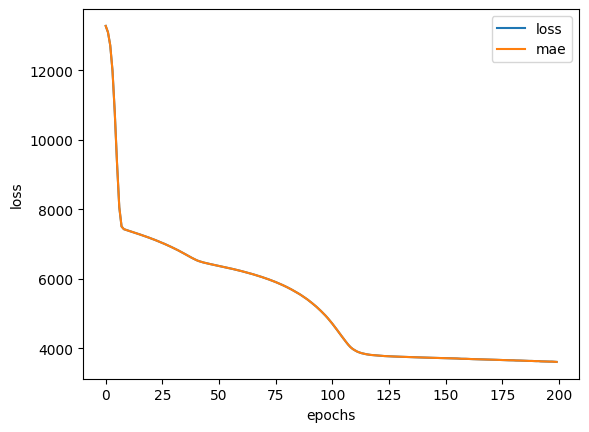

In [ ]:
# plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Final project

In [ ]:
data = pd.read_excel("Copy of featureData.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'Copy of featureData.xlsx'

In [ ]:
data

NameError: name 'data' is not defined

In [ ]:
x=data.drop(["column9","column8"],axis=1)
y1=data["column9"]
y2=data["column8"]
y=np.column_stack((y1,y2))
# split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
tf.random.set_seed(42)

data_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
data_model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mse"])

data_model.fit(X_train,y_train,epochs=200)

## Preprocessing data(normalization and stans)


In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
# Read the insurance
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),# turn all values from 0 to 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])

)
# create x y
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

# Bild train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# fit hte column transformer to training data
ct.fit(X_train)
# Transform training and test data with normalization (MinMaxScaler), and OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)


In [ ]:
# what does data look like
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [ ]:

X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# shape
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
# Biuld a neural network
tf.random.set_seed(42)
# 1. Create a model
insurance_model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. fit the model
insurance_model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13297.0020 - mae: 13297.0020
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13289.3535 - mae: 13289.3535
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13269.6279 - mae: 13269.6279
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13227.2412 - mae: 13227.2412
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13151.5645 - mae: 13151.5645
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13031.9629 - mae: 13031.9629
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12857.8604 - mae: 12857.8604
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12619.1738 - mae: 12619.1738
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12306.1709 - mae: 12306.1709
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11912.6357 - mae: 11912.6357
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11446.1084 - mae: 11446.1084
Epoch 12/100
34/34 ━━━━━━━━━━━

In [ ]:
# Evaluation
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3515.8801 - mae: 3515.8801  


[3430.50537109375, 3430.50537109375]

In [ ]:
insurance_model_02.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

In [ ]:
2**2

4

True